In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('C://Users//DELL//Downloads//remote_work_productivity.csv')
df

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


In [3]:
df.describe()

,Employee_ID,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.720000,68.602000,63.975000
std,288.819436,8.042779,12.235494,13.870572
min,1.000000,16.000000,33.000000,14.000000
25%,250.750000,34.750000,60.000000,56.000000
50%,500.500000,40.000000,68.000000,65.000000
75%,750.250000,45.000000,76.000000,73.000000
max,1000.000000,64.000000,112.000000,104.000000


In [4]:
df.isna().sum()

Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
dtype: int64

### Label Encoding

In [5]:
df['Employment_Type'] = df['Employment_Type'].astype('category').cat.codes
df

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,1,29,75,78
1,2,0,45,49,47
2,3,1,34,74,89
3,4,1,25,81,84
4,5,1,50,70,74
...,...,...,...,...,...
995,996,1,33,88,82
996,997,1,33,88,73
997,998,0,45,74,61
998,999,0,57,50,52


In [6]:
data = df.iloc[:,1:]
data

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,29,75,78
1,0,45,49,47
2,1,34,74,89
3,1,25,81,84
4,1,50,70,74
...,...,...,...,...
995,1,33,88,82
996,1,33,88,73
997,0,45,74,61
998,0,57,50,52


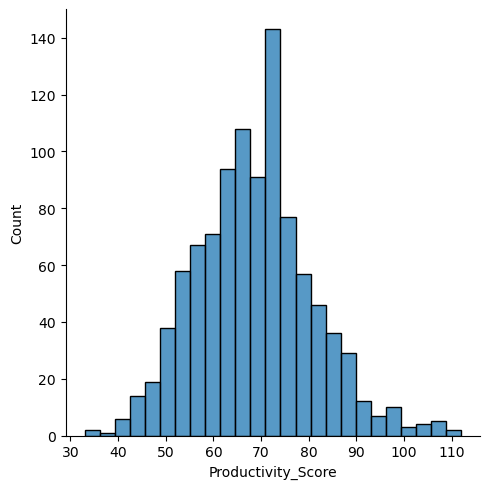

In [7]:
sns.displot(df['Productivity_Score'])
plt.show()

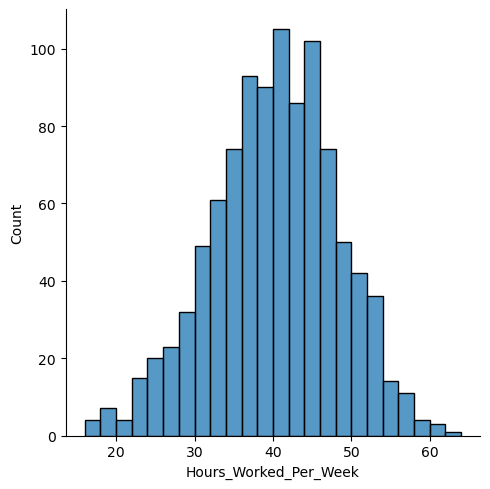

In [8]:
sns.displot(df['Hours_Worked_Per_Week'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


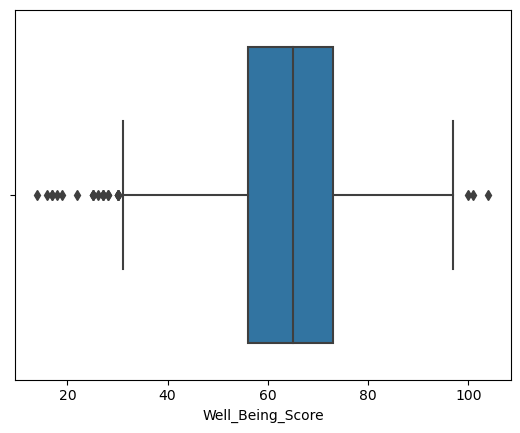

In [9]:
sns.boxplot(data['Well_Being_Score'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


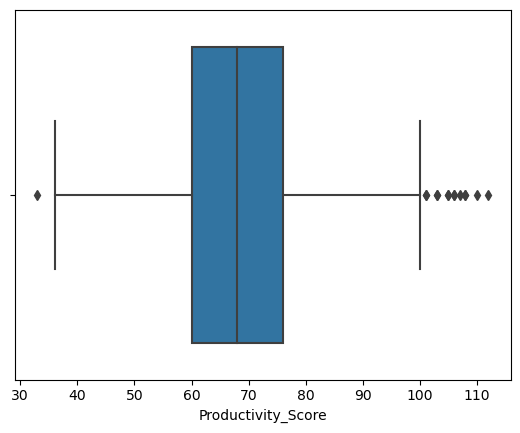

In [10]:
sns.boxplot(data['Productivity_Score'])
plt.show()

### Checking the employee working hours whose Productive_Score is between 80 to 100

In [11]:
a = df[(df['Productivity_Score']>=80) &(df['Productivity_Score']<=100)]
display(a)

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
3,4,1,25,81,84
12,13,1,37,80,52
15,16,1,44,81,69
19,20,1,46,83,58
33,34,0,41,80,69
...,...,...,...,...,...
972,973,1,41,88,50
983,984,1,35,83,65
995,996,1,33,88,82
996,997,1,33,88,73


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


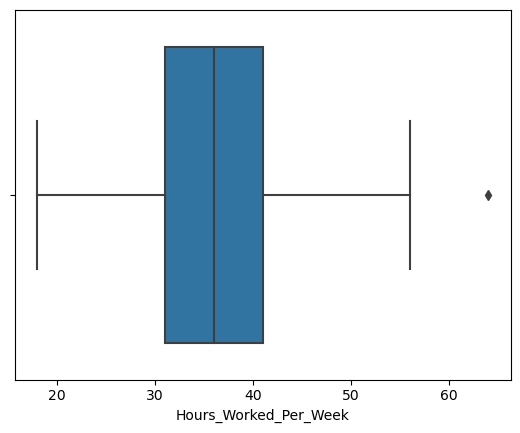

In [12]:
sns.boxplot(a['Hours_Worked_Per_Week'])
plt.show()

### Removing Outliers

In [13]:
q1 = data['Productivity_Score'].quantile(0.25)
q3 = data['Productivity_Score'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [14]:
ds = data[(data['Productivity_Score'] >= lower)  & (data['Productivity_Score'] <= upper)]
ds

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,29,75,78
1,0,45,49,47
2,1,34,74,89
3,1,25,81,84
4,1,50,70,74
...,...,...,...,...
995,1,33,88,82
996,1,33,88,73
997,0,45,74,61
998,0,57,50,52


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


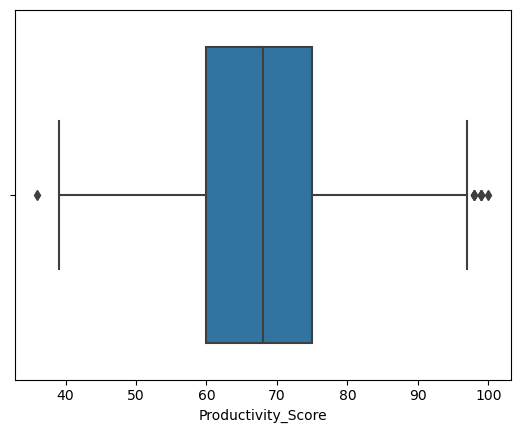

In [15]:
sns.boxplot(ds['Productivity_Score'])
plt.show()

In [16]:
q1 = data['Well_Being_Score'].quantile(0.25)
q3 = data['Well_Being_Score'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [17]:
ds = ds[(ds['Well_Being_Score'] >= lower)  & (data['Well_Being_Score'] <= upper)]
ds

C:\Users\DELL\AppData\Local\Temp\ipykernel_5708\4202999108.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds = ds[(ds['Well_Being_Score'] >= lower)  & (data['Well_Being_Score'] <= upper)]


,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,29,75,78
1,0,45,49,47
2,1,34,74,89
3,1,25,81,84
4,1,50,70,74
...,...,...,...,...
995,1,33,88,82
996,1,33,88,73
997,0,45,74,61
998,0,57,50,52


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


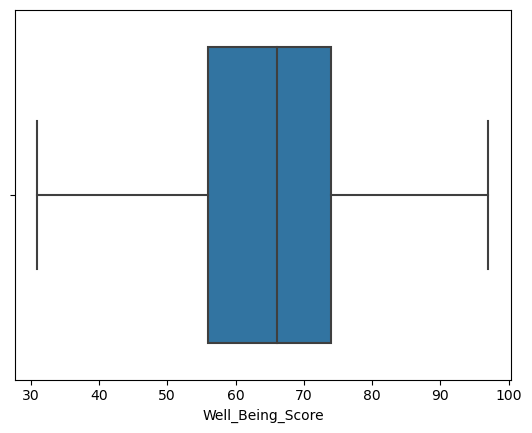

In [18]:
sns.boxplot(ds['Well_Being_Score'])
plt.show()

In [19]:
ds.describe()

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
count,962.000000,962.000000,962.000000,962.000000
mean,0.493763,39.697505,68.262994,64.722453
std,0.500221,8.049856,11.444680,12.621311
min,0.000000,16.000000,36.000000,31.000000
25%,0.000000,34.250000,60.000000,56.000000
50%,0.000000,40.000000,68.000000,66.000000
75%,1.000000,45.000000,75.750000,74.000000
max,1.000000,64.000000,100.000000,97.000000


<Figure size 2000x2000 with 0 Axes>

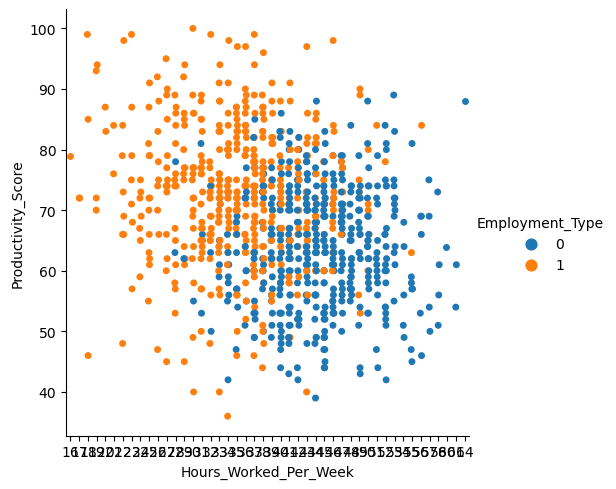

In [20]:
plt.figure(figsize=(20,20))
sns.catplot(data = ds, x = 'Hours_Worked_Per_Week', y = 'Productivity_Score',hue= 'Employment_Type')
plt.show()

In [21]:
b = ds[ds['Hours_Worked_Per_Week']<=40]

In [22]:
b.describe()

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
count,503.000000,503.000000,503.000000,503.000000
mean,0.759443,33.574553,70.536779,67.330020
std,0.427847,5.298078,11.937676,11.220643
min,0.000000,16.000000,36.000000,35.000000
25%,1.000000,31.000000,63.000000,60.000000
50%,1.000000,35.000000,71.000000,67.000000
75%,1.000000,38.000000,78.000000,75.000000
max,1.000000,40.000000,100.000000,97.000000


In [23]:
ds_corr = ds.corr()
ds_corr

,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
Employment_Type,1.000000,-0.598066,0.384629,0.375103
Hours_Worked_Per_Week,-0.598066,1.000000,-0.246947,-0.248294
Productivity_Score,0.384629,-0.246947,1.000000,0.123203
Well_Being_Score,0.375103,-0.248294,0.123203,1.000000


In [24]:
# There is no correlation between variables

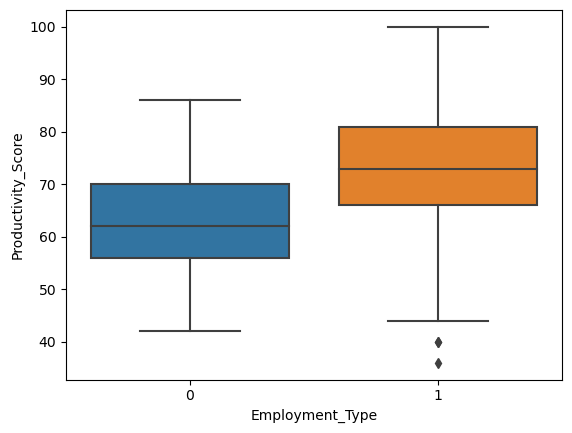

In [25]:
sns.boxplot(data = b, x = 'Employment_Type', y = 'Productivity_Score')
plt.show()

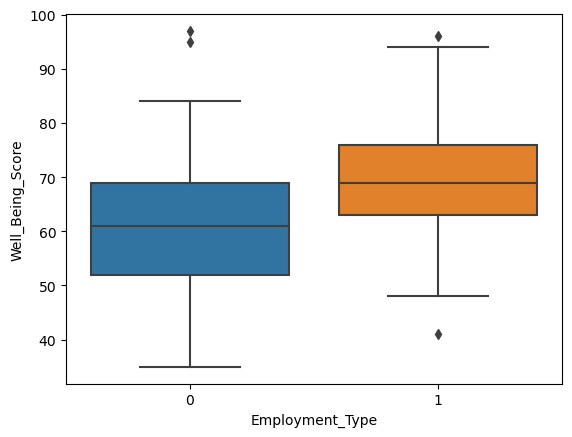

In [26]:
sns.boxplot(data = b, x = 'Employment_Type', y = 'Well_Being_Score')
plt.show()

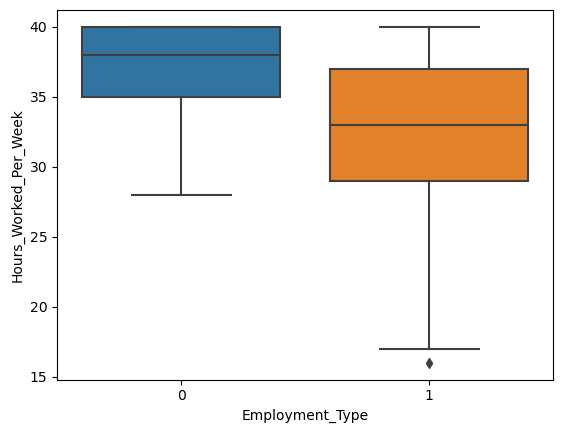

In [27]:
sns.boxplot(data = b, x = 'Employment_Type', y = 'Hours_Worked_Per_Week')
plt.show()
# In Remote working type, majority of employees work between 30 to 35 hours

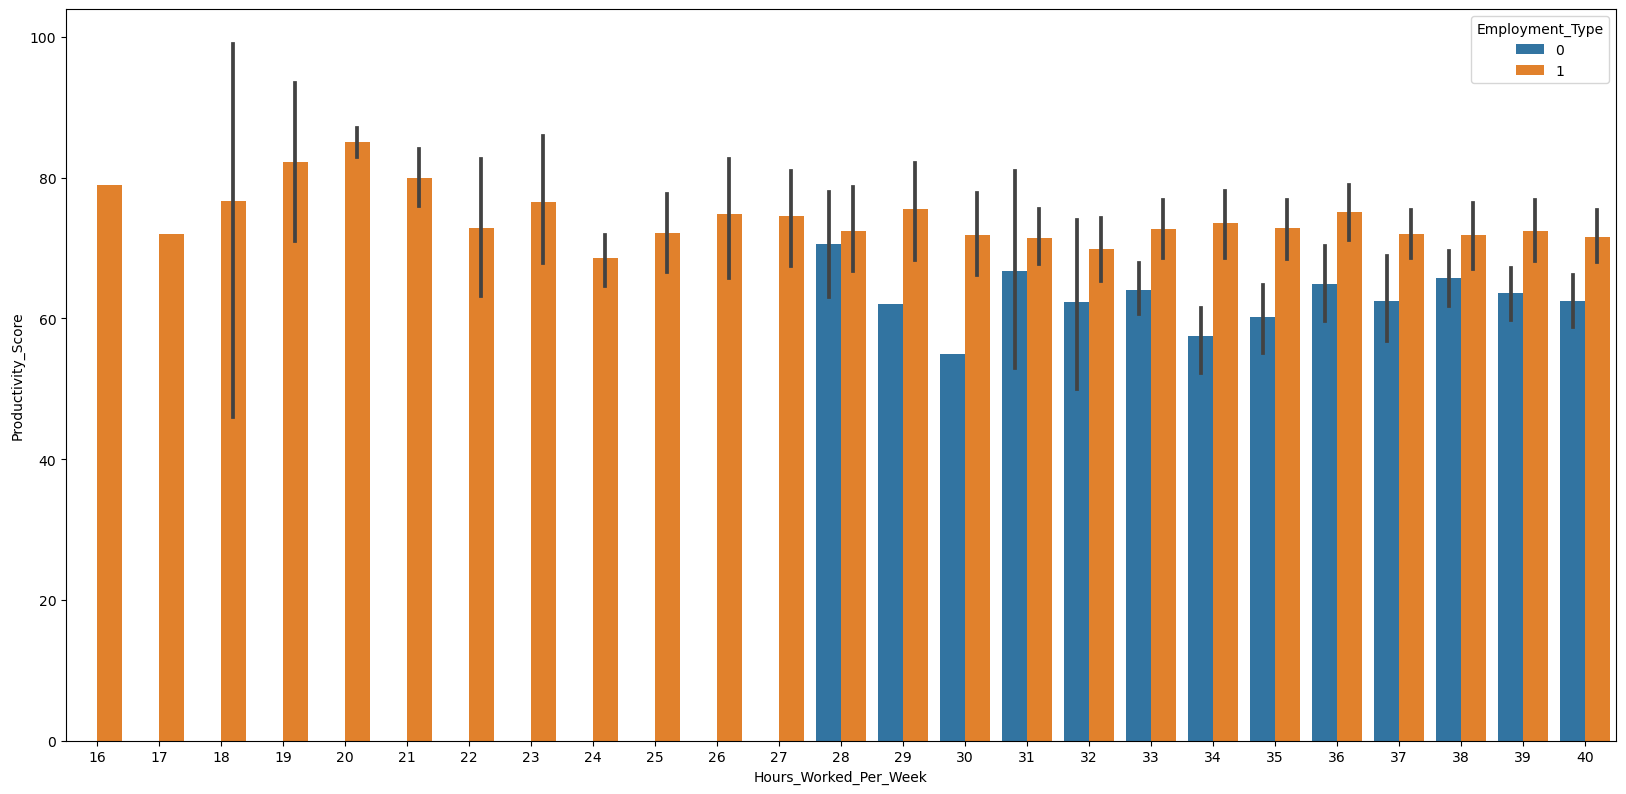

In [28]:
plt.figure(figsize=(20,9.5))
sns.barplot(data = b, hue = 'Employment_Type', x = 'Hours_Worked_Per_Week',y='Productivity_Score')
plt.show()

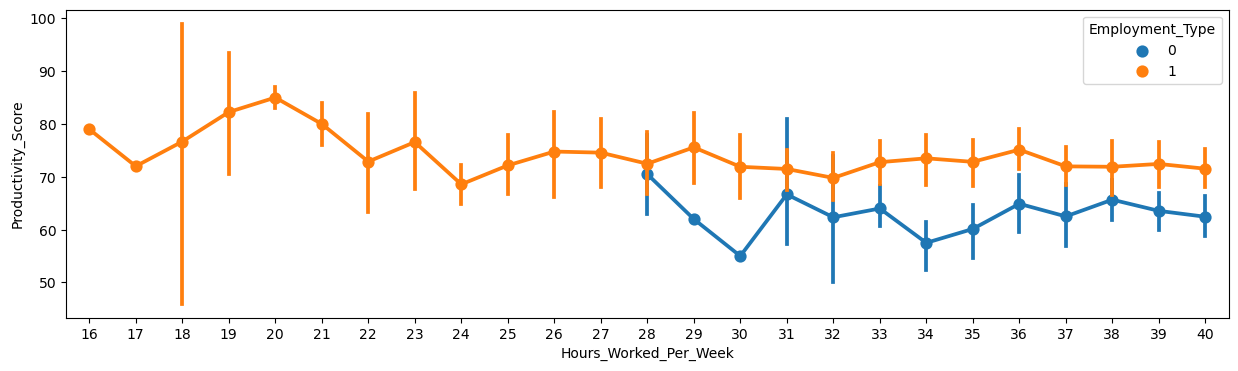

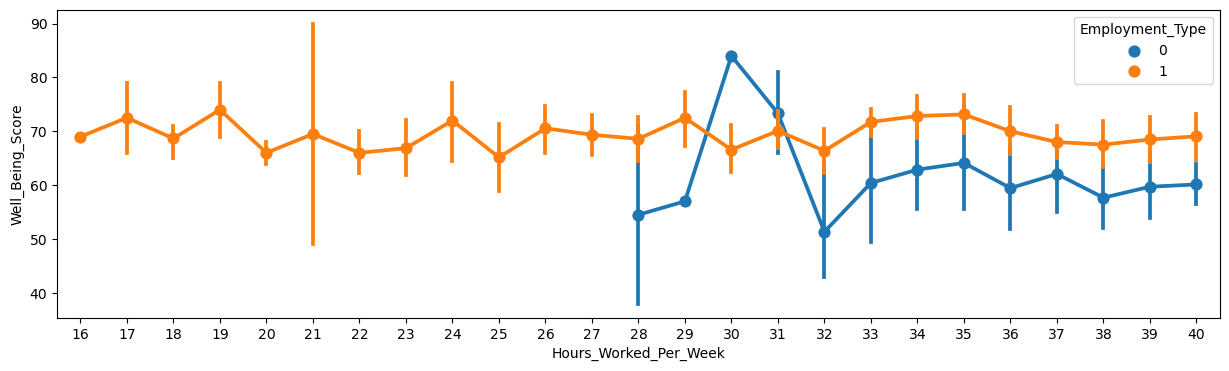

In [29]:
plt.figure(figsize=(15,4))
sns.pointplot(data = b, hue = 'Employment_Type', x = 'Hours_Worked_Per_Week',y='Productivity_Score')
plt.show()
plt.figure(figsize=(15,4))
sns.pointplot(data = b, hue = 'Employment_Type', x = 'Hours_Worked_Per_Week',y='Well_Being_Score')
plt.show()

In [30]:
for x in [29,30,31,32,33,34,35]:
    c = ds[(ds['Hours_Worked_Per_Week']==x) & (ds['Employment_Type']==1)].sum()
    print(x,'hours:',c)

29 hours: Employment_Type            14
Hours_Worked_Per_Week     406
Productivity_Score       1058
Well_Being_Score         1015
dtype: int64
30 hours: Employment_Type            19
Hours_Worked_Per_Week     570
Productivity_Score       1366
Well_Being_Score         1265
dtype: int64
31 hours: Employment_Type            25
Hours_Worked_Per_Week     775
Productivity_Score       1787
Well_Being_Score         1752
dtype: int64
32 hours: Employment_Type            19
Hours_Worked_Per_Week     608
Productivity_Score       1326
Well_Being_Score         1261
dtype: int64
33 hours: Employment_Type            30
Hours_Worked_Per_Week     990
Productivity_Score       2183
Well_Being_Score         2152
dtype: int64
34 hours: Employment_Type            24
Hours_Worked_Per_Week     816
Productivity_Score       1764
Well_Being_Score         1748
dtype: int64
35 hours: Employment_Type            29
Hours_Worked_Per_Week    1015
Productivity_Score       2112
Well_Being_Score         2121
dtype: int64

### From the graph analysis,
1. Employee who works in Remote work type has high productivity and well being scores.

2. Most of the remote type employees work between 30 to 35 hours per week.

3. In that employees who work for 34 hours per week has the highest average productivity score and well being score based on dividing the productivity score / head count and Well_being_score / head count.
 Eg : 34 hours : 1764 / 24 & 1748 / 24

4. I suggest company to follow  34 hours work per week &  remote type employment. 